In [1]:
import pandas as pd
from data.constants import XAMI_MIMIC_PATH, DEFAULT_REFLACX_LABEL_COLS, DEFAULT_MIMIC_CLINICAL_CAT_COLS, DEFAULT_MIMIC_CLINICAL_NUM_COLS
import matplotlib.pyplot as plt

In [2]:
import seaborn as sn

In [3]:
df = pd.read_csv("./spreadsheets/reflacx_with_clinical.csv")

In [4]:
# df['fever'] = df['temperature'] > 100.4

In [5]:
corr_cols = DEFAULT_REFLACX_LABEL_COLS + DEFAULT_MIMIC_CLINICAL_CAT_COLS + DEFAULT_MIMIC_CLINICAL_NUM_COLS

In [6]:
corr_cols

['Enlarged cardiac silhouette',
 'Atelectasis',
 'Pleural abnormality',
 'Consolidation',
 'Pulmonary edema',
 'gender',
 'age',
 'temperature',
 'heartrate',
 'resprate',
 'o2sat',
 'sbp',
 'dbp',
 'pain',
 'acuity']

In [13]:
df['female'] = df['gender'] == "F"

In [15]:
df[corr_cols + ['female']]

,Enlarged cardiac silhouette,Atelectasis,Pleural abnormality,Consolidation,Pulmonary edema,gender,age,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,female
0,5.0,0.0,0.0,0.0,0.0,F,69.0,98.1,90.0,18.0,99.0,184.0,75.0,13.0,3.0,True
1,5.0,0.0,0.0,0.0,0.0,F,69.0,98.1,90.0,18.0,99.0,184.0,75.0,13.0,3.0,True
2,5.0,0.0,0.0,0.0,0.0,F,69.0,98.1,90.0,18.0,99.0,184.0,75.0,13.0,3.0,True
3,0.0,0.0,0.0,0.0,0.0,F,69.0,98.1,90.0,18.0,99.0,184.0,75.0,13.0,3.0,True
4,5.0,0.0,0.0,0.0,0.0,F,69.0,98.1,90.0,18.0,99.0,184.0,75.0,13.0,3.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,0.0,0.0,0.0,0.0,0.0,F,43.0,98.0,101.0,18.0,98.0,132.3,72.4,8.0,3.0,True
666,0.0,0.0,0.0,0.0,0.0,M,31.0,97.5,76.0,16.0,100.0,141.0,66.0,2.0,3.0,False
667,0.0,0.0,0.0,0.0,0.0,M,38.0,97.5,115.0,16.0,99.0,187.0,104.0,8.0,2.0,False
668,0.0,0.0,0.0,0.0,0.0,F,42.0,98.6,108.0,18.0,96.0,180.0,109.0,10.0,3.0,True


In [16]:
corr_maxtrix= df[corr_cols + ['female']].corr()

In [17]:
corr_maxtrix

,Enlarged cardiac silhouette,Atelectasis,Pleural abnormality,Consolidation,Pulmonary edema,age,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,female
Enlarged cardiac silhouette,1.000000,0.100048,0.155596,0.081996,0.235569,0.210398,-0.004177,-0.096640,0.161156,-0.012901,0.024263,-0.030920,0.063492,-0.076606,-0.041540
Atelectasis,0.100048,1.000000,0.298760,0.356878,0.014845,0.152942,-0.027563,-0.003785,0.095556,-0.030124,-0.097538,-0.076028,-0.037479,-0.096477,-0.119600
Pleural abnormality,0.155596,0.298760,1.000000,0.317042,0.135410,0.152118,-0.023623,-0.087061,0.096334,-0.061420,-0.090033,-0.126966,-0.073374,0.003194,-0.053867
Consolidation,0.081996,0.356878,0.317042,1.000000,0.106803,0.145190,0.023644,0.066576,0.206597,-0.122146,-0.095747,-0.085035,-0.016880,-0.089523,-0.040683
Pulmonary edema,0.235569,0.014845,0.135410,0.106803,1.000000,0.185587,0.000035,-0.067001,0.093134,-0.068247,0.027942,-0.034629,0.105222,-0.023437,-0.009391
age,0.210398,0.152942,0.152118,0.145190,0.185587,1.000000,-0.085805,-0.262837,0.150951,-0.112436,0.065030,-0.193257,-0.054283,-0.175426,-0.040185
temperature,-0.004177,-0.027563,-0.023623,0.023644,0.000035,-0.085805,1.000000,0.168775,0.029114,-0.035626,-0.054911,-0.009310,-0.000652,-0.023990,-0.006359
heartrate,-0.096640,-0.003785,-0.087061,0.066576,-0.067001,-0.262837,0.168775,1.000000,0.106803,-0.049584,-0.093896,0.079760,0.128220,-0.054608,0.093309
resprate,0.161156,0.095556,0.096334,0.206597,0.093134,0.150951,0.029114,0.106803,1.000000,-0.172583,0.045264,-0.052822,0.015860,-0.189961,0.045244
o2sat,-0.012901,-0.030124,-0.061420,-0.122146,-0.068247,-0.112436,-0.035626,-0.049584,-0.172583,1.000000,0.062497,0.044309,0.006064,0.175448,0.010827


[]

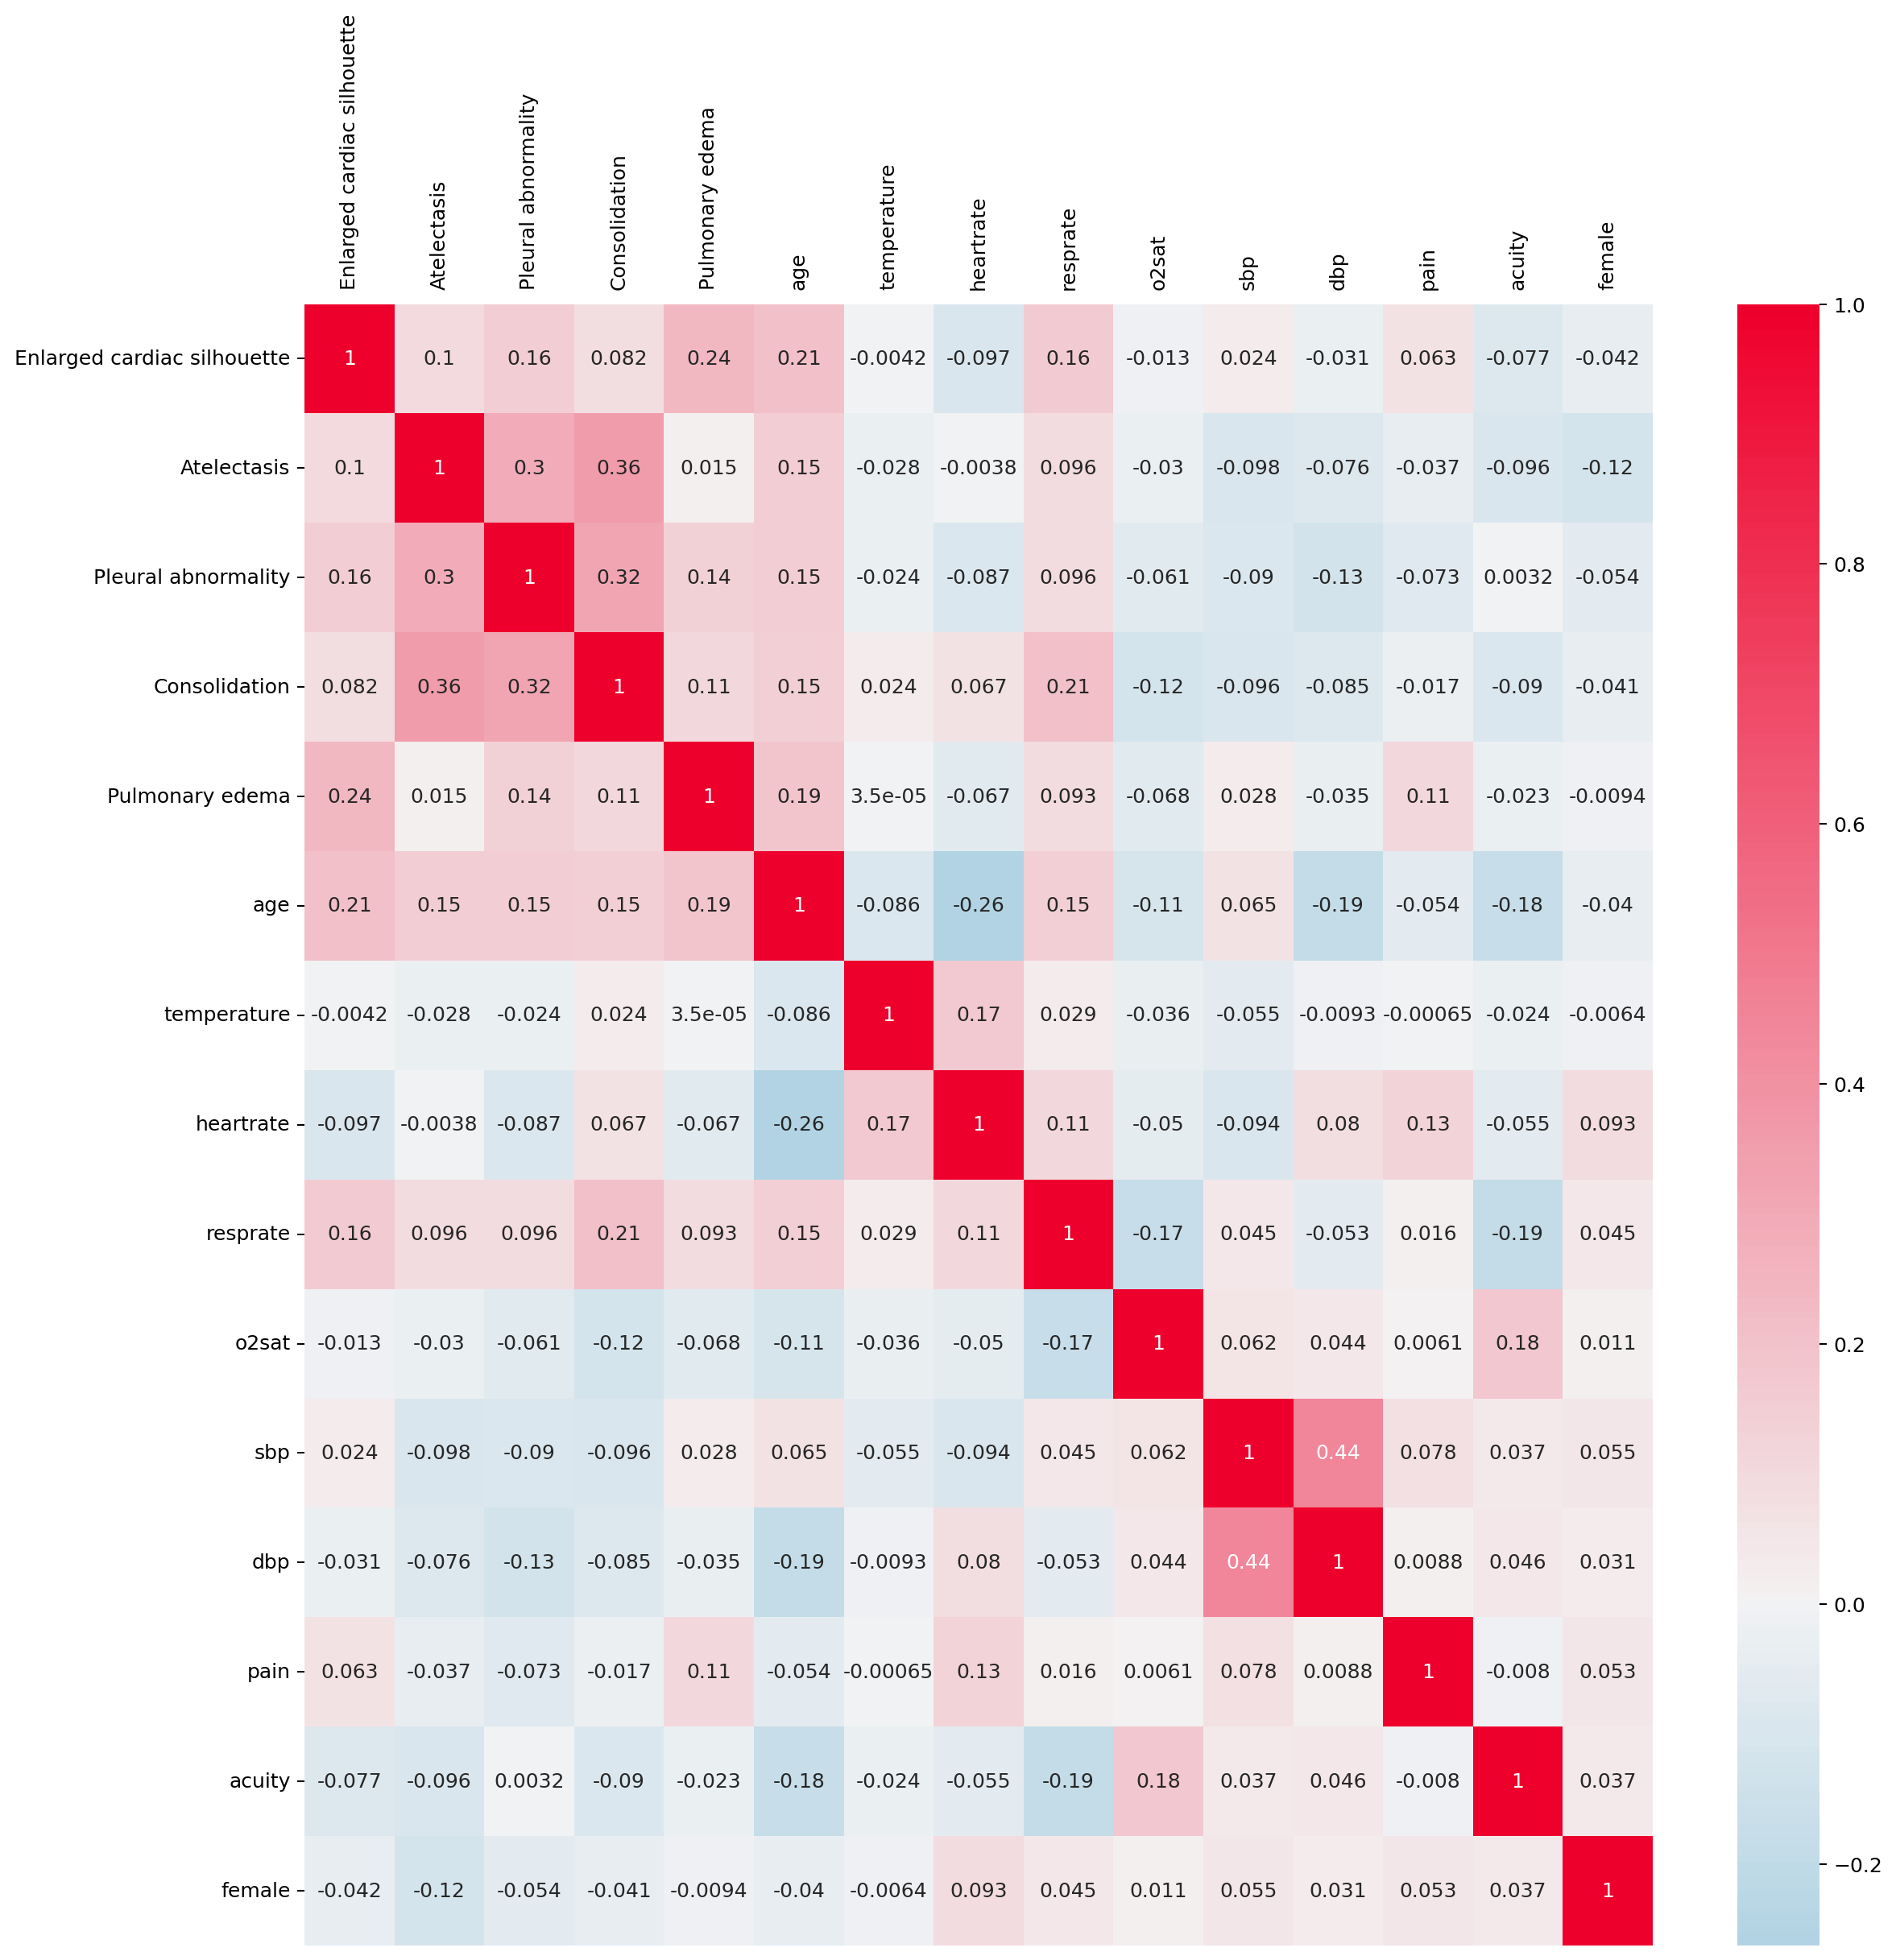

In [43]:
plt.figure(figsize=(15, 15), dpi=180)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
cmap = sn.diverging_palette(240, 10, as_cmap=True, sep=1, s=100, n=40)
sn.heatmap(corr_maxtrix, annot=True,  cmap=cmap, center=0)
plt.plot()

[]

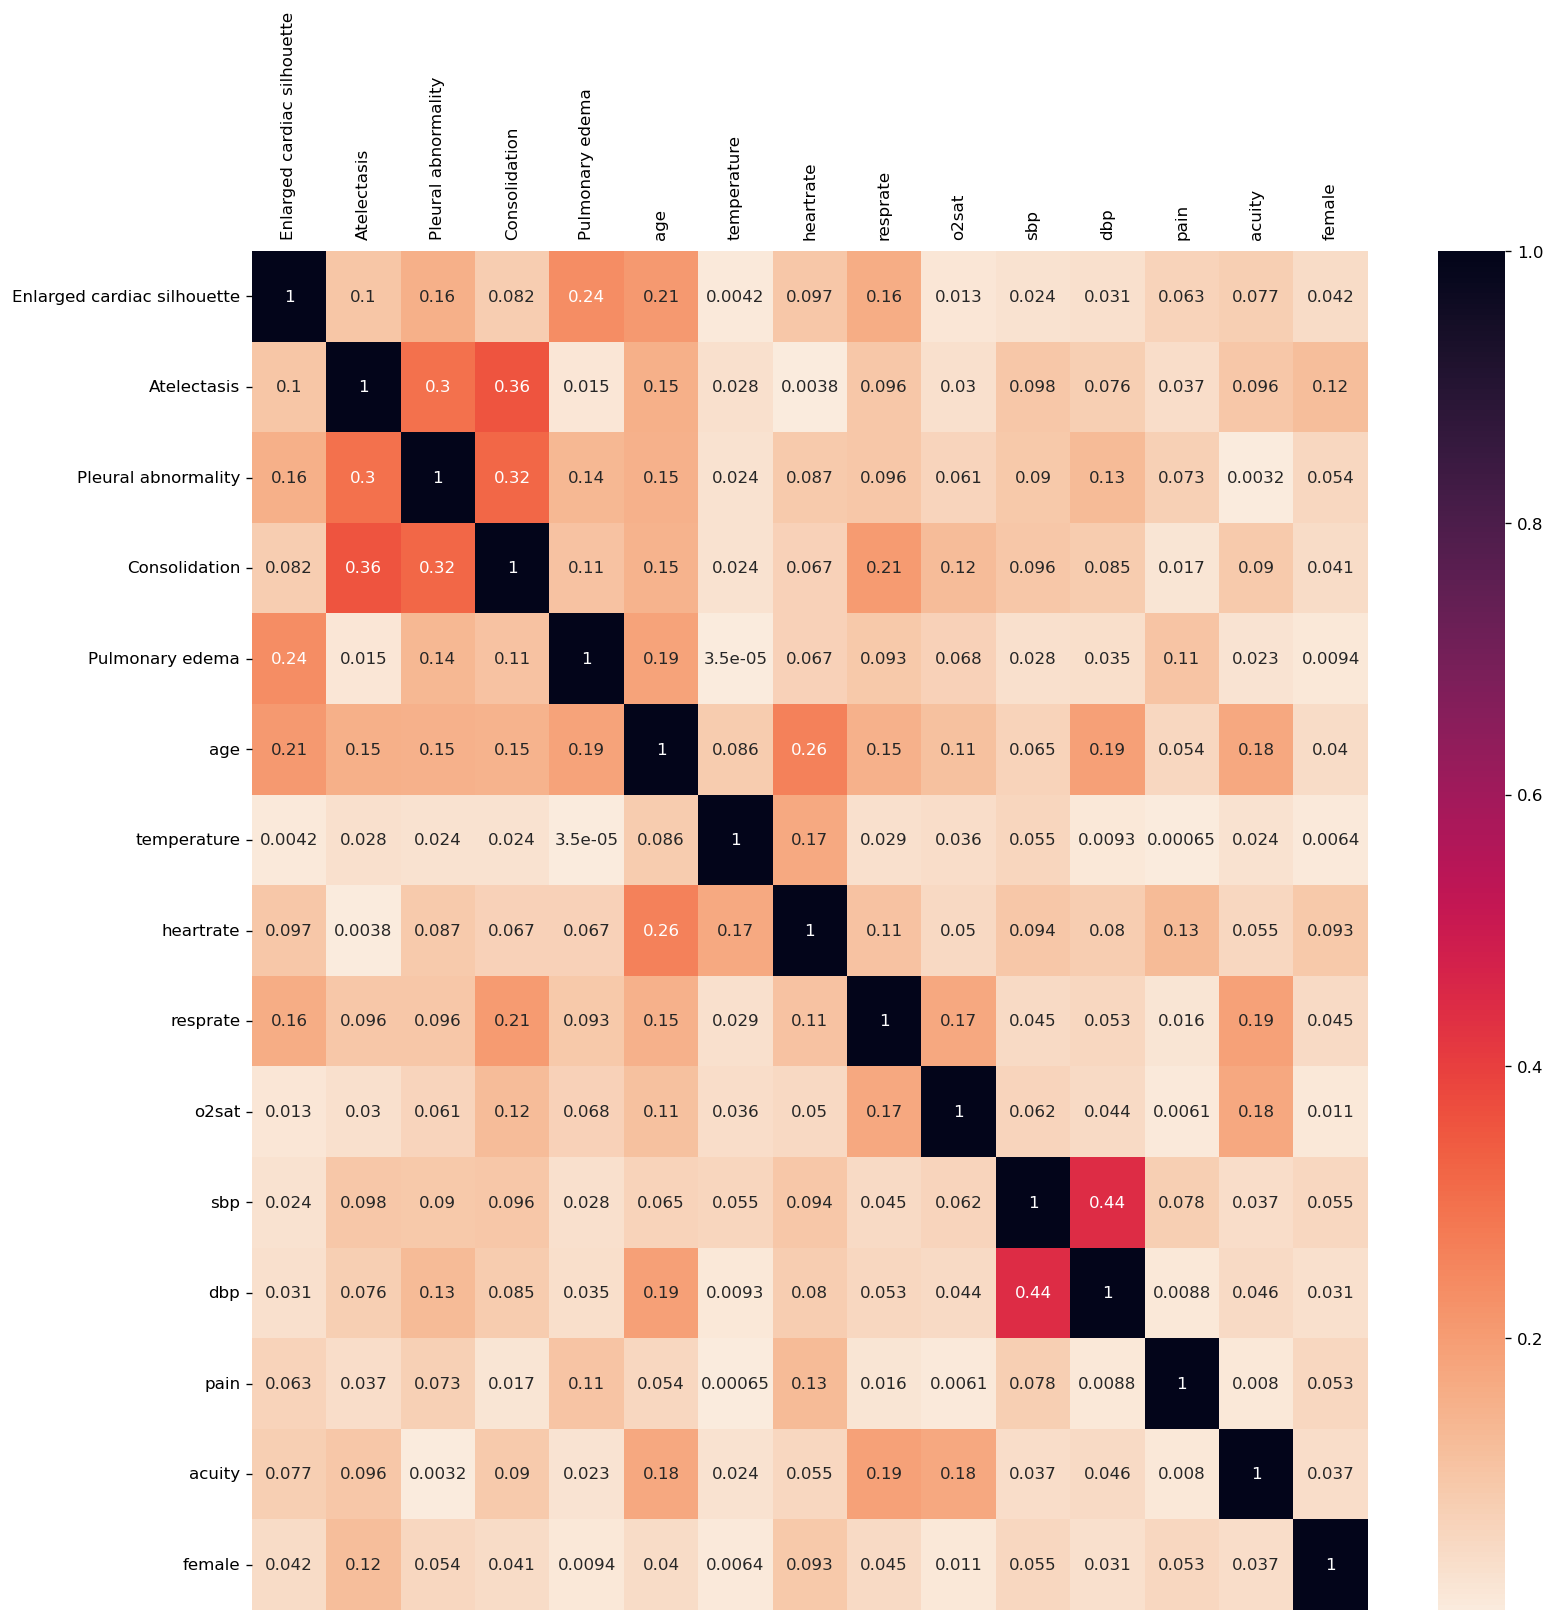

In [19]:
# ABS version

plt.figure(figsize=(15, 15), dpi=120)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
sn.heatmap(abs(corr_maxtrix), annot=True, cmap="rocket_r")
plt.plot()